## Model Training

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge 
from sklearn.neighbors import KNeighborsRegressor #جيد للبيانات البسيطة، حساس للقيم المتطرفة
from sklearn.tree import DecisionTreeRegressor #سهل الفهم، بس ممكن يعمل Overfit
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor # يحسن من أداء نماذج ضعيفةقوي جدًا ودقيق  AdaBoostRegressor
from sklearn.svm import SVR #جيد للبيانات غير الخطية، لكن بطيء
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor #تُستخدم لبناء نماذج تعلم آلي وبتعتمد على Boosted Decision Trees ex) XGBoost ✅ أداء عالي ودقة ممتازة	
from xgboost import XGBRegressor #✅randomforest أداء عالي جدًا	لذالك تدخل في المسابقات  افضل من 


In [7]:
df=pd.read_csv(r'D:\Data_Science\7-Machine_Learning\projects\END_TO_END\NoteBook\Data\stud.csv')

In [8]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [10]:
x=df.drop('math_score',axis=1) #ملحوظه الاكسيس دا بيقولو اعمل كذا وخد نسخه متلعبش ف الاصليه

In [11]:
x.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [12]:
print('gender variable:',df['gender'].unique())
print('race_ethnicity variable:',df['race_ethnicity'].unique())
print('parental_level_of_education variable:',df['parental_level_of_education'].unique())
print('lunch variable:',df['lunch'].unique())
print('test_preparation_course variable:',df['test_preparation_course'].unique())

gender variable: ['female' 'male']
race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch variable: ['standard' 'free/reduced']
test_preparation_course variable: ['none' 'completed']


In [13]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

---

## Preprocessing


In [ ]:


#1. فصل الأعمدة العددية والتصنيفية:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns



from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# 2. تعريف المحولات
numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')  # ← هنا التعريف الصحيح

#OneHotEncoder بيطبق على التصنيفية
# StandardScaler  على العددية.
preprocessor= ColumnTransformer([
        
        ('OneHotEncoder',cat_transformer,cat_features),#اعمل one hot علي cat_feature واحفظها في cat transformer
        ('StandardScaler',numeric_transformer,num_features)
])

In [20]:
x=preprocessor.fit_transform(x)

In [21]:
x.shape

(1000, 19)

---

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.17)

In [36]:
print(x_train.shape)
print(x_test.shape)

(830, 19)
(170, 19)


---

## Create an Evaluate Function to give all metrics after model Training

In [43]:
def evaluate_model(y_true, y_predicted):
    mae=mean_absolute_error(y_true, y_predicted)
    mse=mean_squared_error(y_true, y_predicted)
    r2s=r2_score(y_true, y_predicted)
    return mae,mse,r2s

In [57]:
models= {
    # name             Object from model
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}
#r2 تعريف قائمة من نماذج الانحدار عشان تجرب وتشوف احسن 
model_list=[]
r2_list=[]


In [76]:
#بقولك امشي علي كل  موديل داخل القاموس الي عملتو
for name, model in models.items():
    
    model.fit(x_train,y_train) #training model
    
#prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

#Evaluate Train and Test dataset
    train_mse,train_mae,train_r2s=evaluate_model(y_train,y_train_pred)
    test_mse,test_mae,test_r2s=evaluate_model(y_test,y_test_pred)

    # اسم النموذج الحالي
    print(name)
    #خزنه في قائمة model_list
    model_list.append(name)


#result
    print("Model performance for training set")
    print("mean_absolute_error trainingSet =",train_mae)
    print("mean_squared_error_error trainingSet =",train_mse)
    print("r2 squared trainingSet =",train_r2s)
    print("--------------------------------------------------")
    print("Model performance for test set")
    print("mean_absolute_error testSet =",test_mae)
    print("mean_squared_error_error testSet =",test_mse)
    print("r2 squared testSet =",test_r2s)
    # للفصل بين نتائج النماذج
    print('='*35)
    print('\n')

    # Append result
    r2_list.append(test_r2s)



#يحول اسامي المودبلز و نسبه الصح  لصفوف واعمده
results_df = pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list
})

results_df.head(10)


LinearRegression
Model performance for training set
mean_absolute_error trainingSet = 28.084297544407608
mean_squared_error_error trainingSet = 4.226400823648226
r2 squared trainingSet = 0.8761930246714613
--------------------------------------------------
Model performance for test set
mean_absolute_error testSet = 29.92235375643891
mean_squared_error_error testSet = 4.323524742537936
r2 squared testSet = 0.876460177873092


Lasso
Model performance for training set
mean_absolute_error trainingSet = 42.63747409497847
mean_squared_error_error trainingSet = 5.109327372714929
r2 squared trainingSet = 0.8120367192734229
--------------------------------------------------
Model performance for test set
mean_absolute_error testSet = 46.409223549258115
mean_squared_error_error testSet = 5.60179998825502
r2 squared testSet = 0.8083911690573639


Ridge
Model performance for training set
mean_absolute_error trainingSet = 28.086628261776507
mean_squared_error_error trainingSet = 4.225305177237032


,Model,R2 Score
0,LinearRegression,0.876460
1,Lasso,0.808391
2,Ridge,0.876338
3,K-Neighbors,0.787013
4,DecisionTree,0.696663
5,RandomForest,0.843601
6,XGBRegressor,0.825562
7,CatBoost,0.861533
8,AdaBoostRegressor,0.827486
9,LinearRegression,0.876460


In [73]:
# اختيار أفضل موديل
best_model_name = results_df.iloc[0]['Model']
best_model_score = results_df.iloc[0]['R2 Score']
print('best_model_name',best_model_name)
print('best_model_score',best_model_score)

best_model_name LinearRegression
best_model_score 0.876460177873092


## **The Best Model Linear Regression  will work on it**

In [ ]:
linear_model=LinearRegression(fit_intercept=True) #fit_intercept=true y=wx+b learn b random / fit_intercept=false b=0
linear_model.fit(x_train,y_train)


LinearRegression()

In [80]:
pred_linear_train=linear_model.predict(x_train)
pred_linear_test=linear_model.predict(x_test)

In [86]:
train_mse_linear,train_mae_linear,train_r2s_linear=evaluate_model(y_train,pred_linear_train)
print("Model performance for training set")
print("mean_absolute_error trainingSet =",train_mae)
print("mean_squared_error_error trainingSet =",train_mse)
print("r2 squared trainingSet =",train_r2s)


Model performance for training set
mean_absolute_error trainingSet = 33.44686943231561
mean_squared_error_error trainingSet = 4.670293547629447
r2 squared trainingSet = 0.8525526325849607


In [87]:
test_mse_linear,test_mae_linear,test_r2s_linear=evaluate_model(y_test,pred_linear_test)
print("Model performance for test set")
print("mean_absolute_error testSet =",test_mae)
print("mean_squared_error_error testSet =",test_mse)
print("r2 squared testSet =",test_r2s)

Model performance for test set
mean_absolute_error testSet = 41.852122863113784
mean_squared_error_error testSet = 5.341063541053531
r2 squared testSet = 0.8272059793080292


## Plot y_pred and y_test

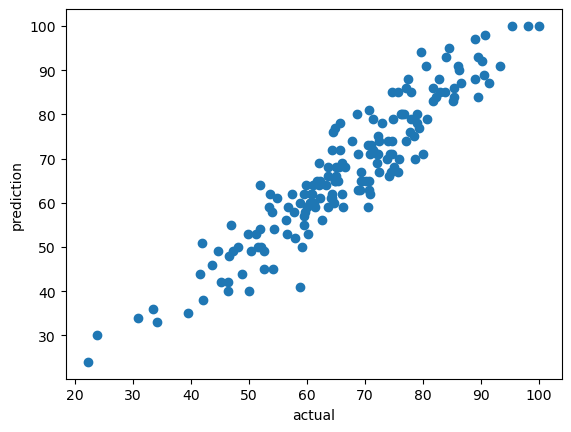

In [88]:
plt.scatter(pred_linear_test,y_test)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.show()

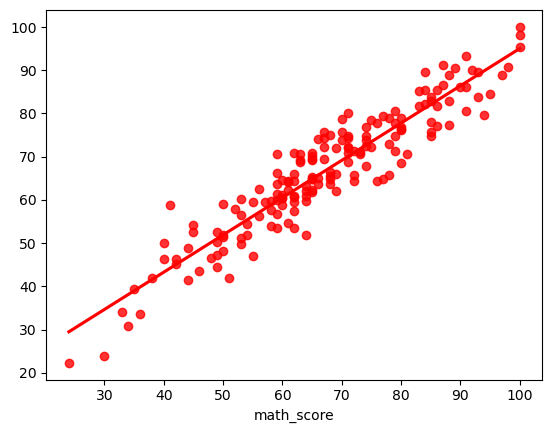

In [119]:

sns.regplot(x=y_test, y=pred_linear_test, ci=None, color='red')
plt.show()

check Model Normal Or No 

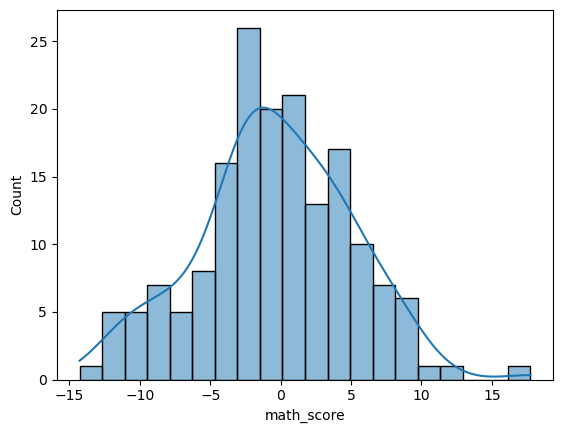

In [106]:
residual=pred_linear_test - y_test
sns.histplot(residual,kde=True,bins=20)
plt.show()


هل تتبع التوزيع الطبيعي ام لا!!

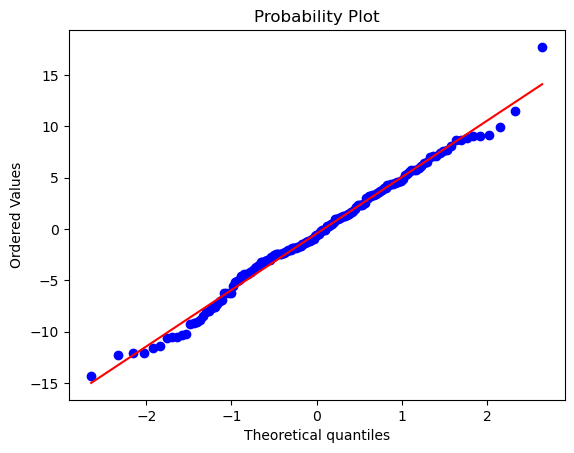

In [101]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist='norm',plot=pylab)
plt.show()

Difference between Actual and Predicted Values


In [ ]:
pred_df=pd.DataFrame({'actual':y_test,'Predict':pred_linear_test,'diffrent':y_test - pred_linear_test})
pred_df

,actual,Predict,diffrent
903,93,83.907103,9.092897
259,65,65.313936,-0.313936
647,64,61.996210,2.003790
596,30,23.799331,6.200669
994,63,69.127535,-6.127535
...,...,...,...
573,50,51.989462,-1.989462
957,92,90.132987,1.867013
511,64,51.888199,12.111801
333,90,86.161699,3.838301


<Axes: xlabel='math_score'>

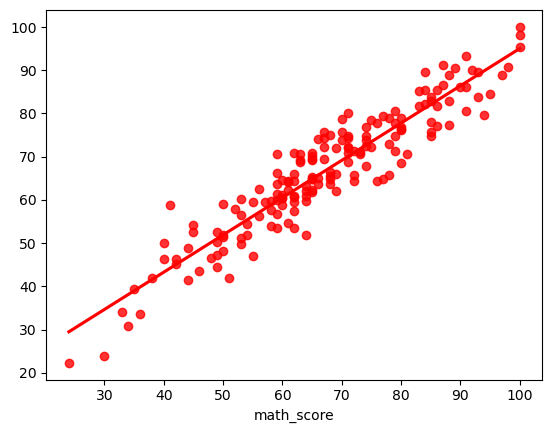